In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Sentiment Analysis: IMDB Movie Reviews

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/content/drive/MyDrive/imdb/IMDB_Dataset.csv')
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


#### Checking if we have any null values in the dataset

In [5]:
data.isnull().sum()

review       0
sentiment    0
dtype: int64

#### Converting Categorical Labels into Discrete

In [6]:
data.replace(['positive', 'negative'], [1,0], inplace = True)

In [7]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


### Exploring Data

#### Positive Review Example

In [8]:
positive = data[data.sentiment == 1].sample(n = 1)['review'].iloc[0]
positive

'Also known as "Stairway to Heaven" in the US. During WWII British Peter Carter\'s (David Niven) plane is shot down in combat but he survives. He meets and falls in love with lovely June (Kim Hunter). But it seems a mistake was made in Heaven--he should have died! A French spirit comes to get him but he refuses. He is soon to plead his case in front of a Heavenly Tribunal that he should be allowed to live.<br /><br />Sounds ridiculous but this is actually an incredible film. The script is good with the actors playing the roles completely straight-faced and it\'s beautifully directed--the scenes on Earth are in breath-taking Technicolor (I\'ve never seen such beautiful blue skies) and the scenes in Heaven are in black and white! Niven is a little stiff at times but Hunter is just great (and very beautiful) and Roger Livesey is superb as a doctor trying to help Niven. The imagery throughout is amazing (especially the staircase and during the final trial sequence) and the special effects 

#### Negative Review Example

In [9]:
negative = data[data.sentiment == 0].sample(n = 1)['review'].iloc[0]
negative

'Stereotyped, derivative, unoriginal and boring Western. The two popular stars (Charlton Heston and James Coburn) both give performances that are far from their best, and justifiably so; they both have superficial roles and character traits stated mainly by dialogue. Heston is a sheriff who "liked the world better as it used to be before" and Coburn is an outlaw who "owes something to the man who locked him up and has to pay his debt". Additionally, Heston is so old that he has trouble riding a horse and Coburn is mean and tough but not as cold-blooded a killer as some of the minor villains. Apparently, the filmmakers couldn\'t come up with even ONE original idea about how to make this movie somewhat distinguished. (*1/2)'

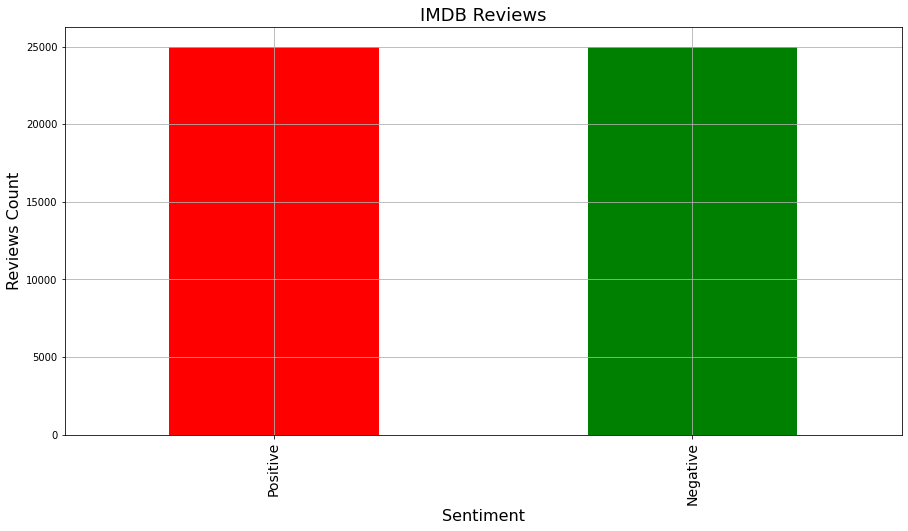

In [10]:
fig, axs = plt.subplots(figsize = (15,7.5))

data['sentiment'].value_counts().plot.bar(color = ['red', 'green'])

plt.xticks(np.arange(2), ('Positive', 'Negative'), fontsize = 14)
axs.set_title('IMDB Reviews', fontsize = 18)
axs.set_xlabel('Sentiment', fontsize = 16)
axs.set_ylabel('Reviews Count', fontsize = 16)
axs.grid()
plt.show()

In [11]:
data.sentiment.value_counts()

1    25000
0    25000
Name: sentiment, dtype: int64

#### 1) Removing HTML Tags using Regular Expression

In [12]:
data.review

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object

#### Dealing with the stopwords

In [13]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [14]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [15]:
stop_words = set(stopwords.words('english'))

In [16]:
import re

#### Preprocessing 

****Removing HTML tags****

****Removing irrelevant characters****

****Converting entire corpus into lower case****

****Removing stopwords****

****Converting entire dataset into lowercase****

****Tokenization****

****Normalization (Lemmatization)****

In [17]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
preprocessed_review = []
for i in range(len(data.review)):
    cleaning = re.compile('<.*?>')                          # Pattern for removing html tags
    cleaning1 = re.compile('[^aA-zZ0-9]+')                  # Pattern for removing all the punctuations, commas, and other characters which can act as noise in data
    review = re.sub(cleaning, '', data.review.iloc[i])      # First substituing all the html tags with empty space
    review = re.sub(cleaning1, ' ', review)                 # Then substitutin all irrelevant characters with a single space
    
    review = review.lower()                                 # Converting all the text in reviews to lower case
    
    tokens = word_tokenize(review)                          # Splitting the reviews into individual words (tokenization)
    
    del review
    
    swords = []                                             # An empty list for storing all the words except stop words
    for word in tokens:
        if word not in stop_words:
            swords.append(word)
    del tokens
    
    lemmatizer = WordNetLemmatizer()                        # Normalization (Lemmatization)
    
    lemmas = []
    for lemma in swords:
        norm = lemmatizer.lemmatize(lemma)
        lemmas.append(norm)
    
    del swords
    
    lemmas = ' '.join(lemmas)
    preprocessed_review.append(lemmas)


In [19]:
print(preprocessed_review[1])

wonderful little production filming technique unassuming old time bbc fashion give comforting sometimes discomforting sense realism entire piece actor extremely well chosen michael sheen got polari voice pat truly see seamless editing guided reference williams diary entry well worth watching terrificly written performed piece masterful production one great master comedy life realism really come home little thing fantasy guard rather use traditional dream technique remains solid disappears play knowledge sens particularly scene concerning orton halliwell set particularly flat halliwell mural decorating every surface terribly well done


In [20]:
len(preprocessed_review)

50000

In [21]:
y = data['sentiment']
y.head()

0    1
1    1
2    1
3    0
4    1
Name: sentiment, dtype: int64

In [22]:
X = data.drop(['sentiment'], axis = 1)
X.head()

,review
0,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...
2,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is..."


In [23]:
X.shape

(50000, 1)

### Keras Text Tokenizer Vectorization

In [24]:
import tensorflow as tf


In [25]:
vocabulary = 15000
embedding = 20
max_length = 150
trunc_type = 'post'
oov_tok = ''

In [26]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [27]:
tokenizer = Tokenizer(num_words = vocabulary, oov_token = oov_tok)
tokenizer.fit_on_texts(preprocessed_review)
word_index = tokenizer.word_index
word_index

{'': 1,
 'movie': 2,
 'film': 3,
 'one': 4,
 'like': 5,
 'time': 6,
 'good': 7,
 'character': 8,
 'story': 9,
 'even': 10,
 'get': 11,
 'would': 12,
 'make': 13,
 'see': 14,
 'really': 15,
 'well': 16,
 'scene': 17,
 'much': 18,
 'bad': 19,
 'people': 20,
 'great': 21,
 'also': 22,
 'first': 23,
 'show': 24,
 'way': 25,
 'thing': 26,
 'made': 27,
 'life': 28,
 'could': 29,
 'think': 30,
 'go': 31,
 'know': 32,
 'watch': 33,
 'love': 34,
 'plot': 35,
 'actor': 36,
 'two': 37,
 'many': 38,
 'seen': 39,
 'year': 40,
 'say': 41,
 'end': 42,
 'never': 43,
 'acting': 44,
 'look': 45,
 'best': 46,
 'little': 47,
 'ever': 48,
 'man': 49,
 'better': 50,
 'take': 51,
 'come': 52,
 'work': 53,
 'still': 54,
 'part': 55,
 'something': 56,
 'director': 57,
 'find': 58,
 'want': 59,
 'back': 60,
 'give': 61,
 'lot': 62,
 'real': 63,
 'guy': 64,
 'watching': 65,
 'performance': 66,
 'woman': 67,
 'play': 68,
 'old': 69,
 'funny': 70,
 'though': 71,
 'another': 72,
 '10': 73,
 'actually': 74,
 'nothin

In [28]:
sequences = tokenizer.texts_to_sequences(preprocessed_review)
padded = pad_sequences( sequences , maxlen = max_length , truncating = trunc_type)

In [29]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(padded, y, test_size = 0.2, random_state = 120, shuffle = True)
print(f'shape of training data is: {xtrain.shape, ytrain.shape}')
print(f'shape of testing data is: {xtest.shape, ytest.shape}')

shape of training data is: ((40000, 150), (40000,))
shape of testing data is: ((10000, 150), (10000,))


#### RNN



In [30]:
from tensorflow.keras.layers import SimpleRNN , BatchNormalization, Dense , Embedding
from tensorflow.keras import Sequential

In [31]:
model = Sequential()
model.add(Embedding(vocabulary , embedding , input_length = max_length ))
model.add(SimpleRNN(32))
model.add(Dense(10))
model.add(Dense(1 , activation = 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 20)           300000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                1696      
                                                                 
 dense (Dense)               (None, 10)                330       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 302,037
Trainable params: 302,037
Non-trainable params: 0
_________________________________________________________________


In [32]:
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [33]:
history = model.fit(xtrain, ytrain, validation_split = (0.1) , epochs=20,  batch_size = 1024 , verbose = 1)

Epoch 1/20
36/36 [==============================] - 7s 150ms/step - loss: 0.6913 - accuracy: 0.5257 - val_loss: 0.6869 - val_accuracy: 0.5580
Epoch 2/20
36/36 [==============================] - 6s 167ms/step - loss: 0.6492 - accuracy: 0.6590 - val_loss: 0.6236 - val_accuracy: 0.6530
Epoch 3/20
36/36 [==============================] - 5s 137ms/step - loss: 0.3937 - accuracy: 0.8354 - val_loss: 0.3671 - val_accuracy: 0.8450
Epoch 4/20
36/36 [==============================] - 5s 139ms/step - loss: 0.1999 - accuracy: 0.9284 - val_loss: 0.4075 - val_accuracy: 0.8260
Epoch 5/20
36/36 [==============================] - 5s 136ms/step - loss: 0.1013 - accuracy: 0.9707 - val_loss: 0.4365 - val_accuracy: 0.8315
Epoch 6/20
36/36 [==============================] - 5s 143ms/step - loss: 0.0501 - accuracy: 0.9881 - val_loss: 0.4904 - val_accuracy: 0.8260
Epoch 7/20
36/36 [==============================] - 6s 173ms/step - loss: 0.0221 - accuracy: 0.9964 - val_loss: 0.5710 - val_accuracy: 0.8230
Epoch 

In [34]:
model.evaluate(xtest,ytest)

313/313 [==============================] - 4s 14ms/step - loss: 0.8574 - accuracy: 0.8268


[0.8574062585830688, 0.8267999887466431]

In [35]:
predictions = np.argmax(model.predict(xtest),axis = 1)
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [36]:
from sklearn.metrics import accuracy_score,confusion_matrix ,classification_report
cm=confusion_matrix(ytest,predictions)
print(cm)

[[4982    0]
 [5018    0]]


In [37]:
print(accuracy_score(ytest,predictions))

0.4982


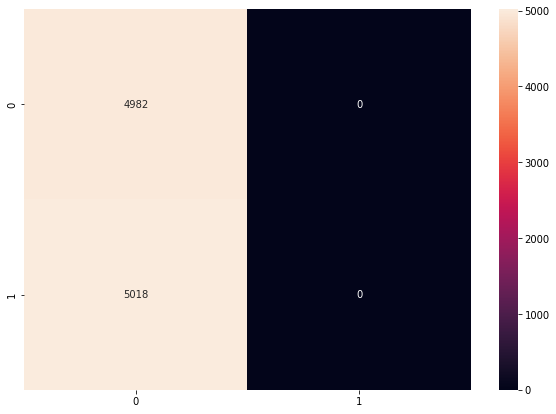

In [38]:
import seaborn as sns

fig = plt.figure(figsize=(10,7))
confusion_matrix = cm
sns.heatmap(confusion_matrix,annot = True,fmt = 'd')

In [39]:
print(classification_report(ytest,predictions))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67      4982
           1       0.00      0.00      0.00      5018

    accuracy                           0.50     10000
   macro avg       0.25      0.50      0.33     10000
weighted avg       0.25      0.50      0.33     10000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Nauve Bayes Model

In [40]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

naive = MultinomialNB()
naive.fit(xtrain, ytrain)
predictions = naive.predict(xtest)
predictions

array([0, 0, 0, ..., 0, 1, 0])

In [41]:
accuracy = accuracy_score(ytest, predictions)
print(f'The accuracy of our model: {accuracy}')

The accuracy of our model: 0.5057


In [42]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [43]:
naive_report = classification_report(ytest, predictions)
print(naive_report)

              precision    recall  f1-score   support

           0       0.50      0.70      0.59      4982
           1       0.51      0.31      0.39      5018

    accuracy                           0.51     10000
   macro avg       0.51      0.51      0.49     10000
weighted avg       0.51      0.51      0.49     10000



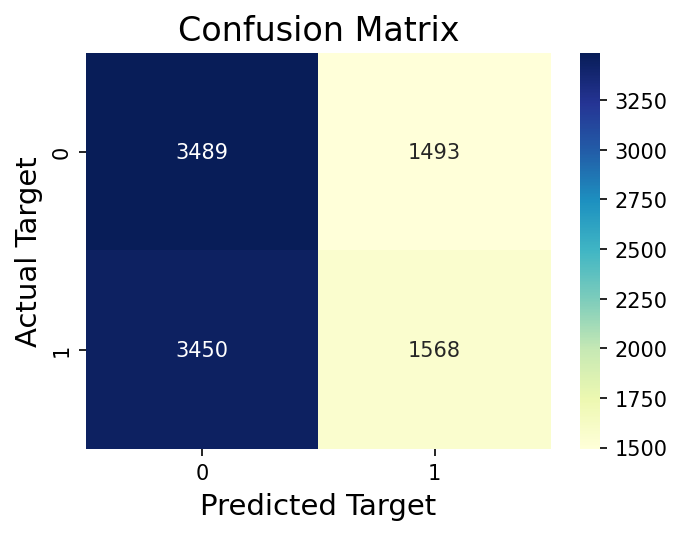

In [44]:
naive_cm = confusion_matrix(ytest, predictions)
fig,axs = plt.subplots(figsize = (5,3.5), dpi = 150)
sns.heatmap(naive_cm, annot = True, fmt = 'd', cmap="YlGnBu")
axs.set_xlabel('Predicted Target', fontsize = 14)
axs.set_ylabel('Actual Target', fontsize = 14)
axs.set_title('Confusion Matrix', fontsize = 16)
plt.style.use('dark_background')


#### Logistic Regression 

In [45]:
from sklearn.linear_model import LogisticRegression

logic = LogisticRegression()
logic.fit(xtrain, ytrain)
logic_pred = logic.predict(xtest)
print(logic_pred)
logic_acc = accuracy_score(ytest, logic_pred)
print(f'Logistic Regression Gave an accuracy  of {logic_acc}')

[1 1 1 ... 1 0 1]
Logistic Regression Gave an accuracy  of 0.5136


In [46]:
logic_report = classification_report(ytest, logic.predict(xtest))
print(logic_report)

              precision    recall  f1-score   support

           0       0.51      0.43      0.47      4982
           1       0.51      0.59      0.55      5018

    accuracy                           0.51     10000
   macro avg       0.51      0.51      0.51     10000
weighted avg       0.51      0.51      0.51     10000



Text(0.5, 1.0, 'Confusion Matrix')

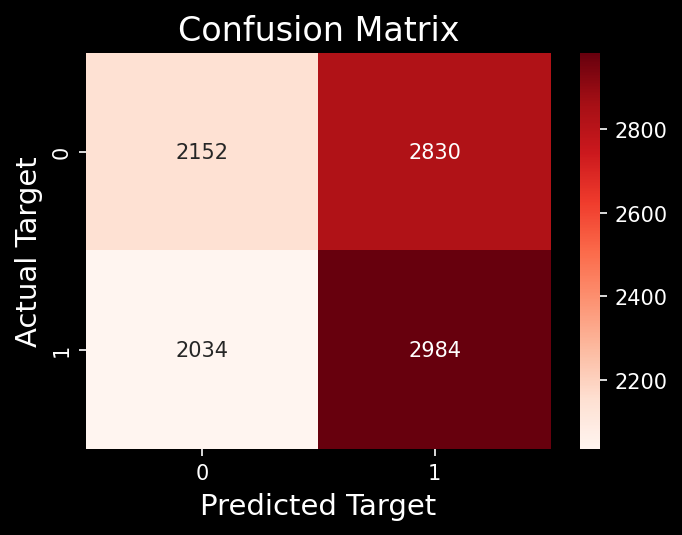

In [50]:
logic_cm = confusion_matrix(ytest,logic_pred)
fig,axs = plt.subplots(figsize = (5,3.5), dpi = 150)
sns.heatmap(logic_cm, annot = True, fmt = 'd', cmap="Reds")
axs.set_xlabel('Predicted Target', fontsize = 14)
axs.set_ylabel('Actual Target', fontsize = 14)
axs.set_title('Confusion Matrix', fontsize = 16)


#### Decision Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
DT = DecisionTreeClassifier()
DT.fit(xtrain, ytrain)

DT_pred = DT.predict(xtest)
print(DT_pred)
        
DT_acc = accuracy_score(ytest, DT_pred)
print(f'Decision Tree gave an accuracy  of {DT_acc}')

[0 0 0 ... 1 1 0]
Decision Tree gave an accuracy  of 0.5169


In [53]:
DT_report = classification_report(ytest, DT.predict(xtest))
print(DT_report)

              precision    recall  f1-score   support

           0       0.51      0.53      0.52      4982
           1       0.52      0.51      0.51      5018

    accuracy                           0.52     10000
   macro avg       0.52      0.52      0.52     10000
weighted avg       0.52      0.52      0.52     10000



In [54]:
DT_pred.shape


(10000,)

In [55]:
ytest.shape

(10000,)

Text(0.5, 1.0, 'Confusion Matrix')

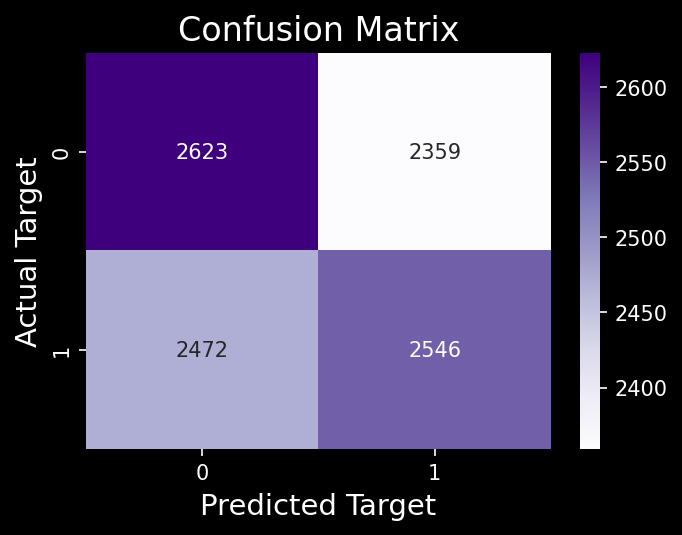

In [57]:
DT_cm = confusion_matrix(ytest, DT_pred)
fig,axs = plt.subplots(figsize = (5,3.5), dpi = 150)
sns.heatmap(DT_cm, annot = True, fmt = 'd', cmap="Purples")
axs.set_xlabel('Predicted Target', fontsize = 14)
axs.set_ylabel('Actual Target', fontsize = 14)
axs.set_title('Confusion Matrix', fontsize = 16)
#plt.style.use('dark_background')


#### Random Forest

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
RF = RandomForestClassifier()
RF.fit(xtrain, ytrain)

Rf_pred = RF.predict(xtest)
print(Rf_pred)

[1 0 1 ... 0 1 0]


In [60]:
RF_acc = accuracy_score(ytest, Rf_pred)
print(f'Random Forest gave an accuracy  of {RF_acc}')

Random Forest gave an accuracy  of 0.5348


In [61]:
RF_report = classification_report(ytest, Rf_pred)
print(RF_report)

              precision    recall  f1-score   support

           0       0.53      0.57      0.55      4982
           1       0.54      0.50      0.52      5018

    accuracy                           0.53     10000
   macro avg       0.54      0.53      0.53     10000
weighted avg       0.54      0.53      0.53     10000



Text(0.5, 1.0, 'Confusion Matrix')

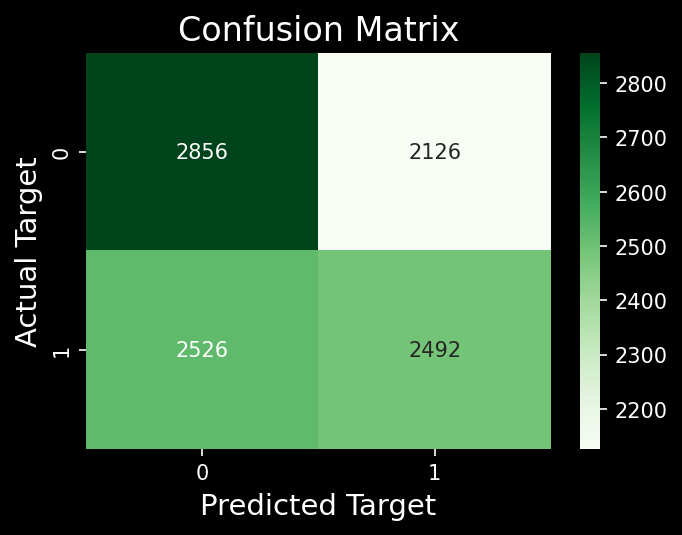

In [62]:
RF_cm = confusion_matrix(ytest, Rf_pred)
fig,axs = plt.subplots(figsize = (5,3.5), dpi = 150)
sns.heatmap(RF_cm, annot = True, fmt = 'd', cmap="Greens")
axs.set_xlabel('Predicted Target', fontsize = 14)
axs.set_ylabel('Actual Target', fontsize = 14)
axs.set_title('Confusion Matrix', fontsize = 16)
#plt.style.use('dark_background')
